## Tutorial Notebook For Dynamic Time Warping Module

In [24]:
#import necessary modules
from dtw import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Basic Usage

(-1.0, 3.0)

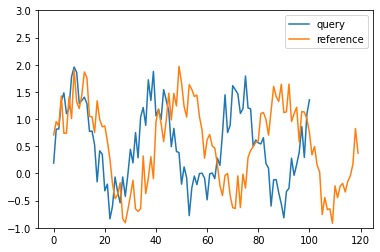

In [15]:
np.random.seed(1234)
# test data
x = np.sin(2*np.pi*3.1*np.linspace(0,1,101))
x += np.random.rand(x.size)
y = np.sin(2*np.pi*3*np.linspace(0,1,120))
y += np.random.rand(y.size)

plt.plot(x,label="query")
plt.plot(y,label="reference")
plt.legend()
plt.ylim(-1,3)

In [16]:
# run DTW
"""
Note: The first run takes a few seconds for jit compilation.
"""
res = dtw(x,y)

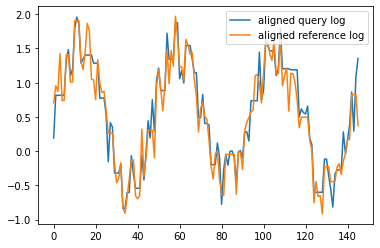

In [17]:
##Plot aligned sine waves
##Note: In this case, the sine waves are used as examples for actual logs.
res.plot_aligned_logs(query=x,reference=y)

- ``distance``" the minimum global distance computed, *not* normalized.
- ``normalizedDistance``: distance computed, *normalized* for path.
- if you want to calculate only dynamic time warp (dtw) distance (i.e. no need to gain alignment path),
give 'distance_only' argument as True (it makes faster).

In [5]:
# dtw distance
print("dtw distance: {}".format(res.distance))
print("dtw normalized distance: {}".format(res.normalized_distance))

dtw distance: 30.04881265458317
dtw normalized distance: 0.13596747807503698


### Usage with respect to stratigraphic correlation of well logs.

In [6]:
#import well log data
well_1 = pd.read_csv("data/wellx1.csv")
well_2 = pd.read_csv("data/wellx2.csv")

#correlate Gamma ray log using Dynamic Time Warp
w1=well_1['GR'][50:100]
w2=well_2['GR'][:50]
#compute alignment vector
res = dtw(w1,w2)
#obtain alignmnet indices
alignmnet_indices= res.path



### Alignment Path

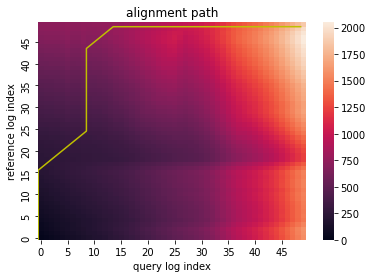

In [7]:
# visualize alignment path with cumsum cost matrix
res.plot_path()

- Methods for plotting stratigraphic correlation using dynamic time warp alignment objects.

- Various plotting styles are available, passing strings to the ``type``.

-  ``alignment`` plots the warping curve.
-  ``threeway`` vis-a-vis inspection of the logs and their warping
   curve.

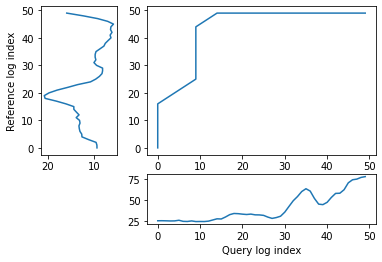

<AxesSubplot:>

In [8]:
#Plot warp curve with respective logs.
res.dtw_plot(query=w1,reference=w2, type='threeway')

### Partial Alignment

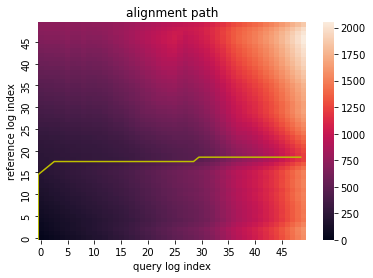

In [11]:
# open end
res = dtw(w1,w2,open_end=True)
res.plot_path()

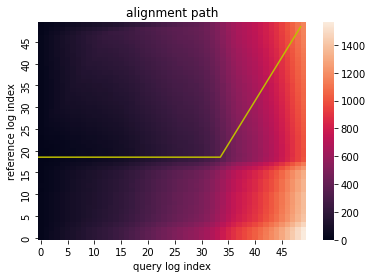

In [12]:
# open begin
res = dtw(w1,w2,step_pattern="asymmetric",open_begin=True)  # open-begin requires "N" normalizable pattern
res.plot_path()

#### Use another distance based metric

In [18]:
"""
you can choose arbitrary metric in scipy.spatial.distance.cdist
"""
res = dtw(x,y,dist="minkowski")

"""
arbitrary function which returns distance value between x and y is also available
"""
res = dtw(x,y,dist=lambda x,y: np.abs(x-y))

#### Use a pre-computed distance matrix

In [22]:
# calculate pair-wise distance matrix in advance
from scipy.spatial.distance import cdist
X = cdist(x[:,np.newaxis],y[:,np.newaxis],metric="euclidean")

#### Use a user defined window

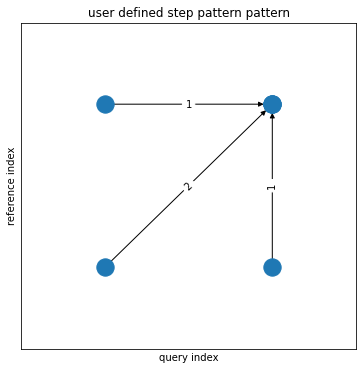

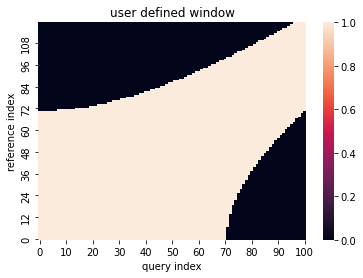

In [23]:
# define local constraint(step pattern)

from window import UserWindow
from step_pattern import UserStepPattern
pattern_info = [
                    dict(
                        indices=[(-1,0),(0,0)],
                        weights=[1]
                    ),
                    dict(
                        indices=[(-1,-1),(0,0)],
                        weights=[2]
                    ),
                    dict(
                        indices=[(0,-1),(0,0)],
                        weights=[1]
                    )
                ]
user_step_pattern = UserStepPattern(pattern_info=pattern_info,normalize_guide="N+M")

# define global constraint(window)
user_window = UserWindow(X.shape[0],X.shape[1],win_func=lambda i,j: np.abs(i**2-j**2) < 5000)

# plot
user_step_pattern.plot()
user_window.plot()

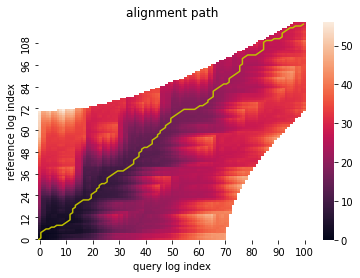

In [25]:
from window import NoWindow
res = dtw_low(X,window=user_window,pattern=user_step_pattern)
res.plot_path()